### Import Library 

In [1]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd

In [2]:
load_dotenv()

api = os.getenv("OPEN_API_KEY")

client = OpenAI(
    api_key=api,
    base_url="https://api.naga.ac/v1"
    )

In [3]:
def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )

    return response.choices[0].message.content

In [4]:
df = pd.read_csv("supermarket_sales.csv")

In [5]:
perintah = (f"Buatkanlah analisis tentang tren penjualan, segmentasi pelanggan dan prediksi penjualan dari dataset\n\n{df}. ")

output_tren_penjualan = generate(perintah)
print(output_tren_penjualan)

Tren Penjualan:
Berdasarkan dataset yang diberikan, kita dapat melihat tren penjualan dari berbagai sudut pandang. Salah satunya adalah melalui analisis total penjualan per jenis produk. Dari data tersebut, kita dapat mengetahui produk apa yang paling laku di pasar. Selain itu, kita juga dapat melihat tren penjualan berdasarkan cabang dan kota. Hal ini dapat membantu dalam merancang strategi pemasaran yang lebih efektif untuk setiap lokasi.

Segmentasi Pelanggan:
Dalam dataset ini, kita dapat membuat segmentasi pelanggan berdasarkan tipe pelanggan, gender, dan metode pembayaran yang digunakan. Dengan melakukan segmentasi pelanggan, kita dapat memahami preferensi dan kebiasaan belanja dari setiap kelompok pelanggan. Hal ini dapat membantu dalam menyusun strategi pemasaran yang lebih terarah dan personalisasi untuk setiap kelompok pelanggan.

Prediksi Penjualan:
Untuk melakukan prediksi penjualan, kita dapat menggunakan data historis penjualan dari dataset ini. Dengan melakukan analisis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Histogram Distribusi Rating

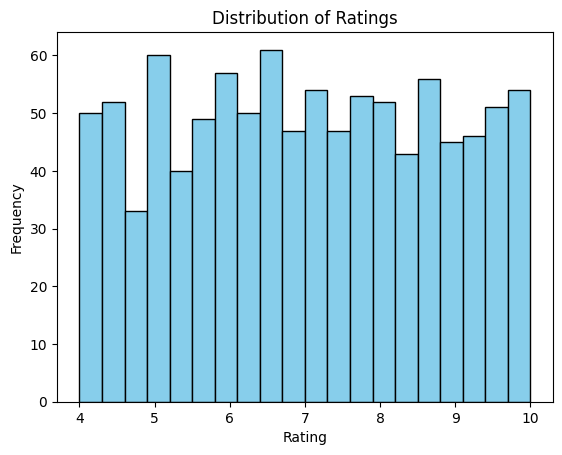

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### Pie Chart untuk Jenis Pelanggan (Customer Type)

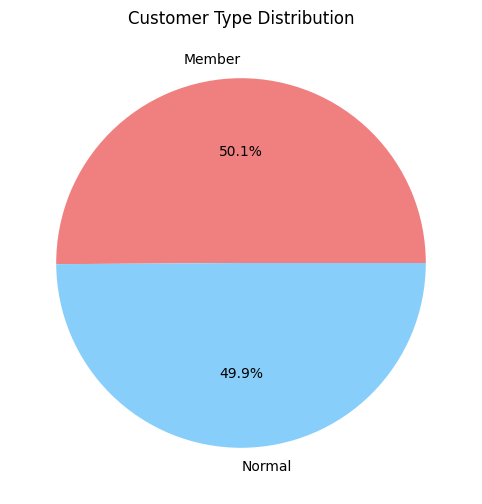

In [9]:
plt.figure(figsize=(8, 6))
df['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()

### Boxplot untuk Harga Unit (Unit Price) berdasarkan Jenis Produk (Product Line)

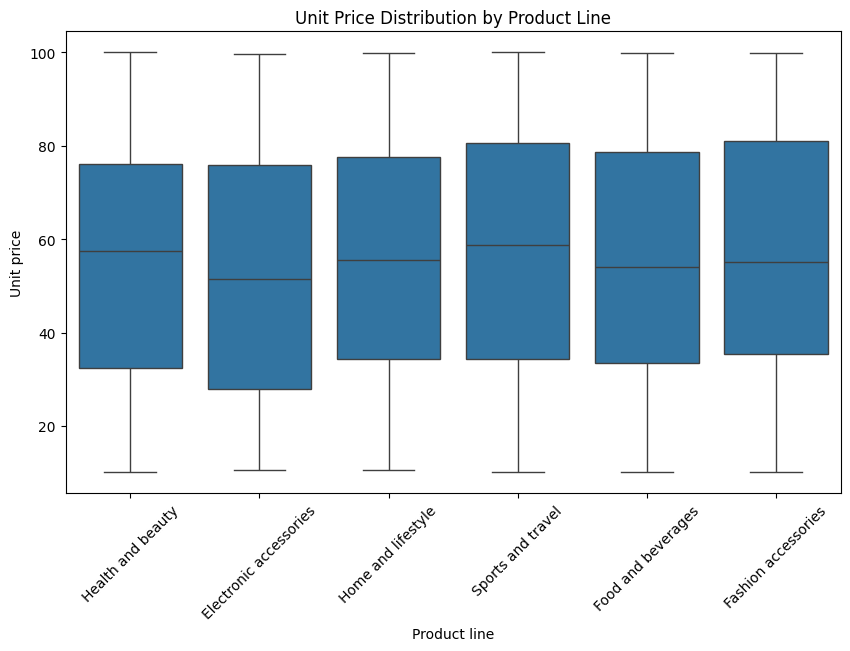

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Unit price', data=df)
plt.title('Unit Price Distribution by Product Line')
plt.xticks(rotation=45)
plt.show()

### Scatter Plot antara Kuantitas (Quantity) dan Total Pembayaran (Total)

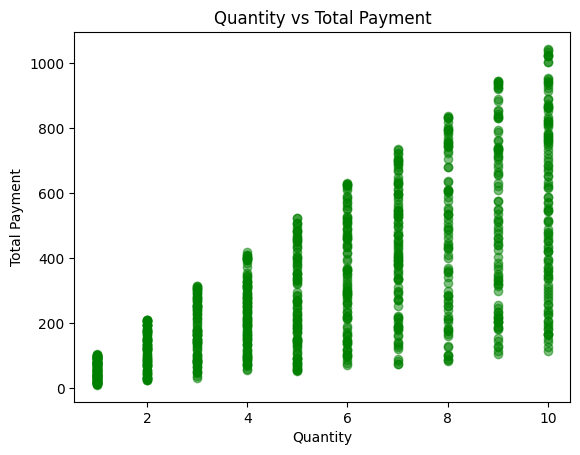

In [13]:
plt.scatter(df['Quantity'], df['Total'], color='green', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Total Payment')
plt.title('Quantity vs Total Payment')
plt.show()

### Bar Chart untuk Cabang (Branch) berdasarkan Jumlah Pembayaran Bruto (Gross Income)

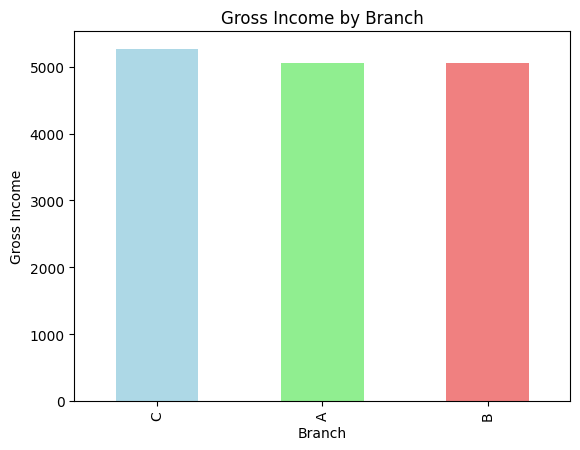

In [14]:
branch_income = df.groupby('Branch')['gross income'].sum().sort_values(ascending=False)
branch_income.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Branch')
plt.ylabel('Gross Income')
plt.title('Gross Income by Branch')
plt.show()